<a href="https://colab.research.google.com/github/AMMS46/IIIT-assignments/blob/main/AIML_Module_1_Lab_1_Extracting_features_from_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 1
# Extracting features from data





In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=19f4eed40771ddf2ce97f8a8a1ac0bf07fe5cd37ac92e1920de9e3a5af33cbef
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [56]:
topic1 = 'Giraffe'
topic2 = 'Apple'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('es')

es1 = wikipedia.page(topic1).content
es2 = wikipedia.page(topic2).content

This is what the text looks like:

In [57]:
es2

'Apple, Inc. (NASDAQ: AAPL, NYSE: AAPL, LSE: ACP)  es una empresa tecnológica estadounidense que diseña y produce equipos electrónicos, software y servicios en línea. Tiene su sede principal en el Apple Park, en Cupertino (California, Estados Unidos) y la sede europea en la ciudad de Cork (Irlanda).[3]\u200bSus productos de hardware incluyen el teléfono inteligente iPhone, la tableta iPad, la computadora personal Mac, el reproductor de medios portátil iPod, el reloj inteligente Apple Watch, las gafas de realidad mixta y computación espacial Apple Vision Pro y el reproductor de medios digitales Apple TV. Entre el software de Apple se encuentran los sistemas operativos iOS, iPadOS, macOS, watchOS, visionOS y tvOS, el explorador de contenido multimedia iTunes, la suite iWork (software de productividad), Final Cut Pro X (una suite de edición de vídeo profesional), Logic Pro (software para edición de audio en pistas de audio), Xsan (software para el intercambio de datos entre servidores) y 

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [4]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [10]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
es1 = cleanup(fr1)
es2= cleanup(fr2)

In [12]:
print(es1)

lasjirafadesudfricagiraffacamelopardalisgiraffaesunasubespeciedegiraffacamelopardaliscuyareaseextiendealsurdelcontinenteafricanosudfricanamibiabotsuanazimbabueysurdemozambiqueconbaseenestudiosgenticosalgunoslaconsideranunaespeciediferentesediferenciadelasotrassubespeciesconlasquesecruzafcilmenteporlasmanchasredondasoenformadeestrellapresentesentodoelpiehastalaspezuasreferenciasenlacesexternoswikispeciestieneunartculosobregiraffagiraffagiraffawikimediacommonsalbergaunacategoramultimediasobregiraffagiraffagiraffa


Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [13]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

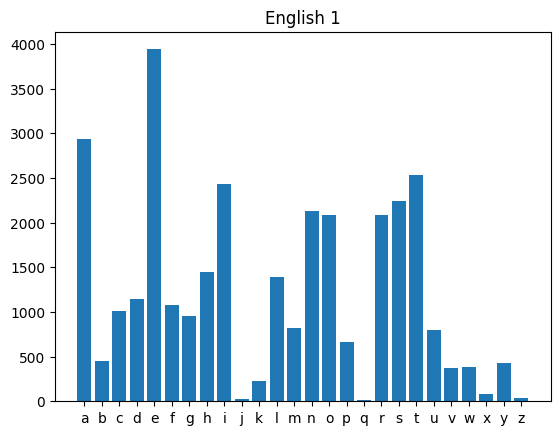

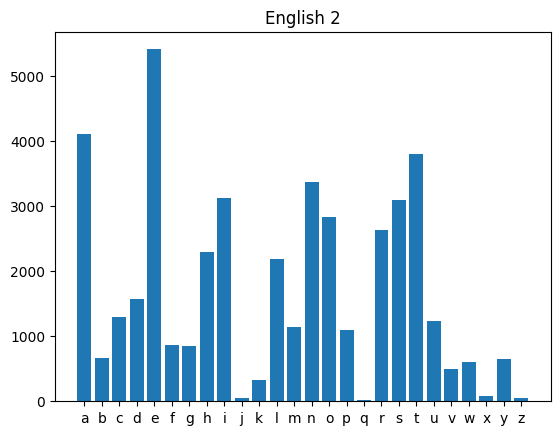

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

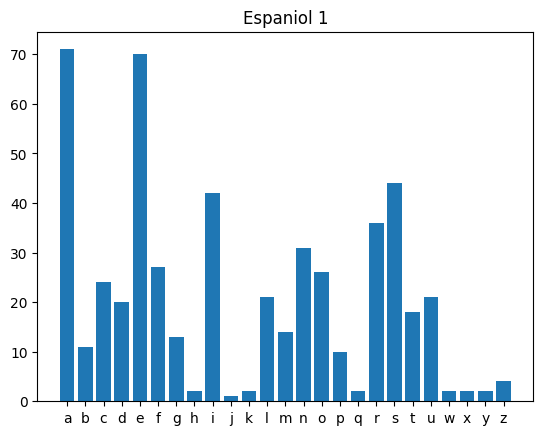

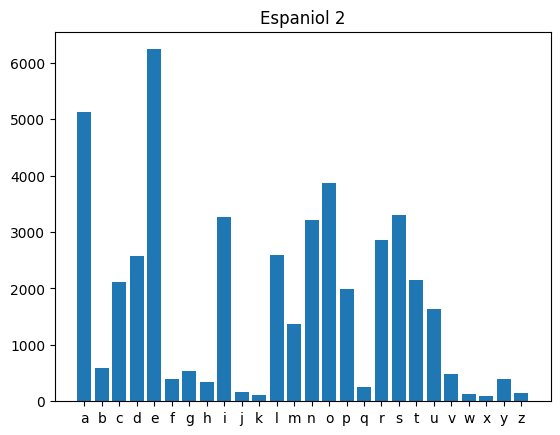

In [17]:
unigram_es1 = Counter(ngrams(es1,1))
plothistogram(unigram_es1)
plt.title('Espaniol 1')
plt.show()
unigram_es2 = Counter(ngrams(es2,1))
plothistogram(unigram_es2)
plt.title('Espaniol 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

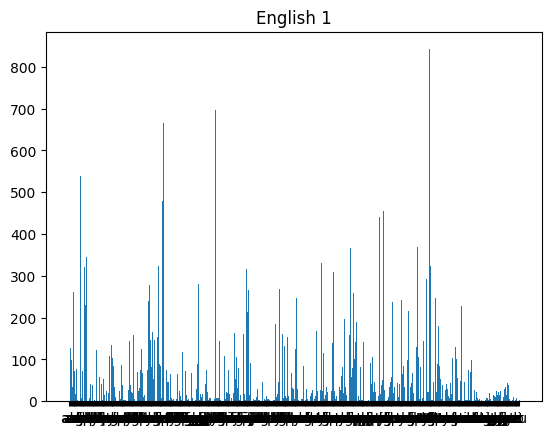

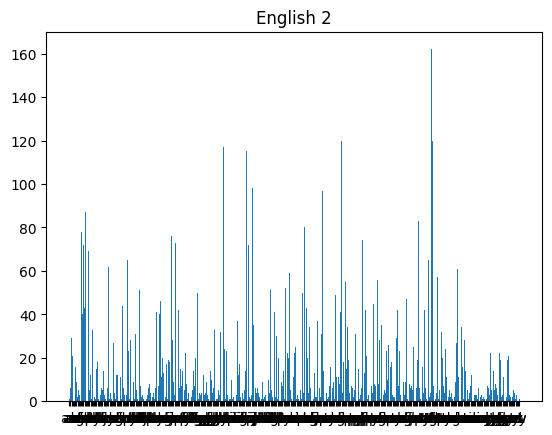

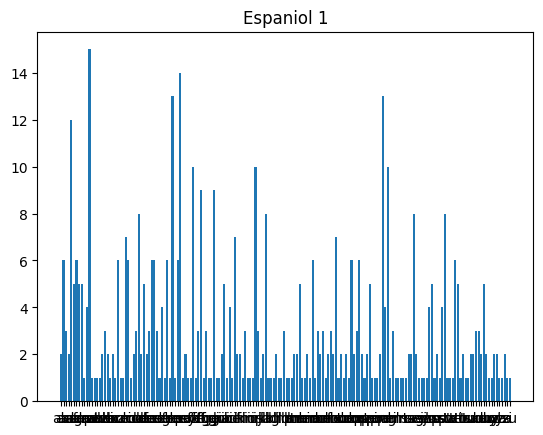

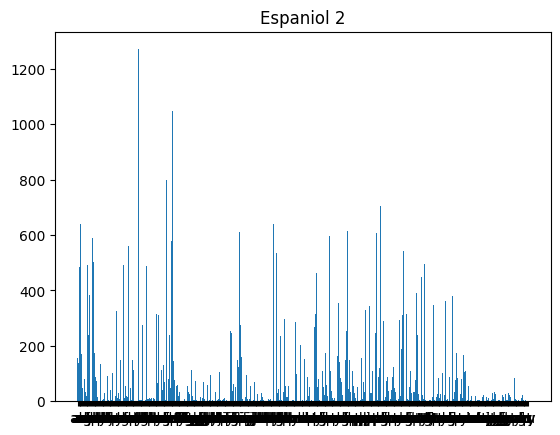

In [19]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_es1 = Counter(ngrams(es1,2))
plothistogram(bigram_es1)
plt.title('Espaniol 1')
plt.show()

bigram_es2 = Counter(ngrams(es2,2))
plothistogram(bigram_es2)
plt.title('Espaniol 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [20]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

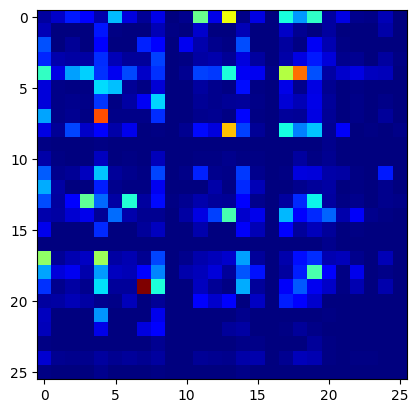

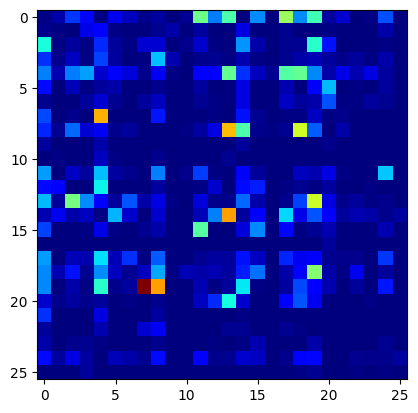

In [21]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

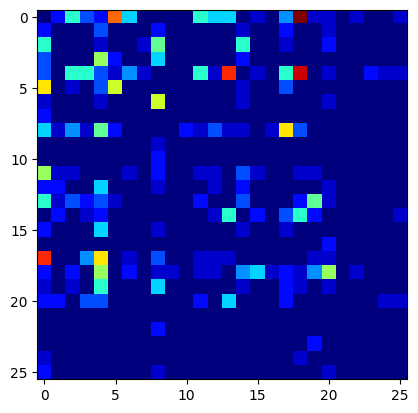

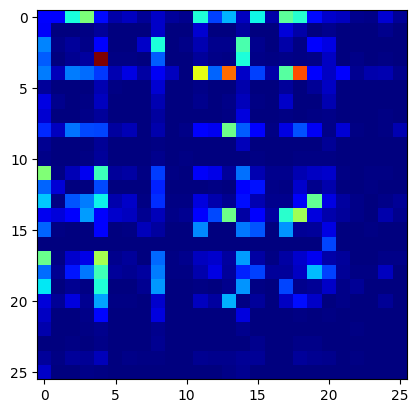

In [28]:
bies1 = plotbihistogram(bigram_es1)
plt.show()
bies2 = plotbihistogram(bigram_es2)

Let us look at the top 10 ngrams for each text.

In [29]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [30]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nEspaniol 1:')
ShowTopN(bies1)
print('\nEspaniol 2:')
ShowTopN(bies2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 162.0
('t', 'i') : 120.0
('o', 'n') : 120.0
('h', 'e') : 117.0
('i', 'n') : 115.0
('i', 's') : 98.0
('n', 't') : 97.0
('a', 'r') : 87.0
('s', 't') : 83.0
('n', 'c') : 80.0

Espaniol 1:
('a', 's') : 15.0
('e', 's') : 14.0
('r', 'a') : 13.0
('e', 'n') : 13.0
('a', 'f') : 12.0
('f', 'a') : 10.0
('r', 'e') : 10.0
('i', 'r') : 10.0
('f', 'f') : 9.0
('g', 'i') : 9.0

Espaniol 2:
('d', 'e') : 1270.0
('e', 's') : 1047.0
('e', 'n') : 1012.0
('e', 'l') : 798.0
('r', 'e') : 704.0
('o', 's') : 690.0
('l', 'a') : 640.0
('a', 'd') : 638.0
('o', 'n') : 613.0
('i', 'n') : 611.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
a) Tried Spanish

2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
a)Elephant to apple

3. How can we use and visualize trigrams and higher n-grams?
a) Just increase the number parameter in the ngram fucntion

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [31]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [34]:
no1 = train_X[train_y==1,:,:]
no2 = train_X[train_y==2,:,:]

Let us visualize a few images here:

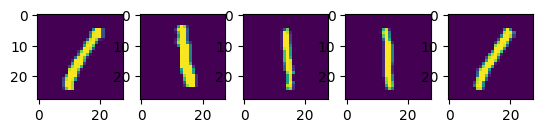

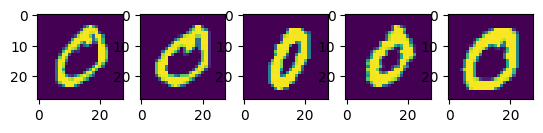

In [33]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no2[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [35]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no2>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

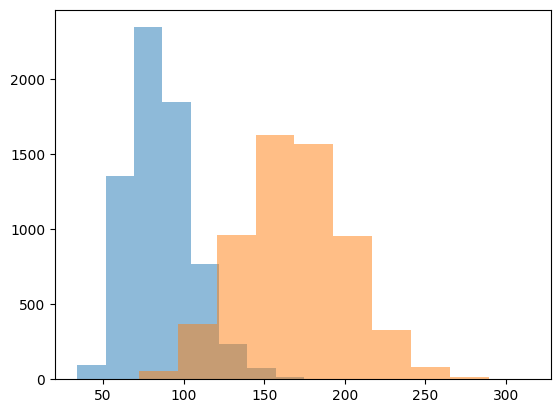

In [37]:
plt.hist(sum1, alpha=0.5);
plt.hist(sum0, alpha=0.5);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [38]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

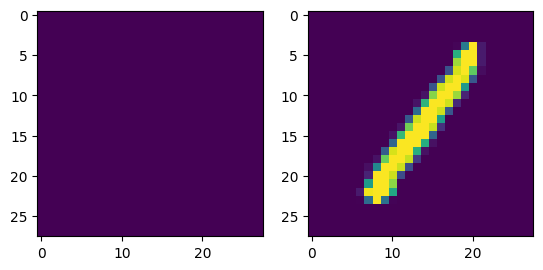

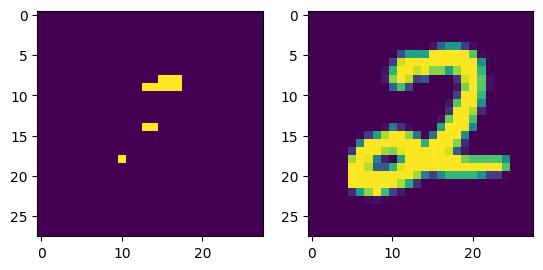

In [40]:
imgs = [no1[450,:,:],  no2[450,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

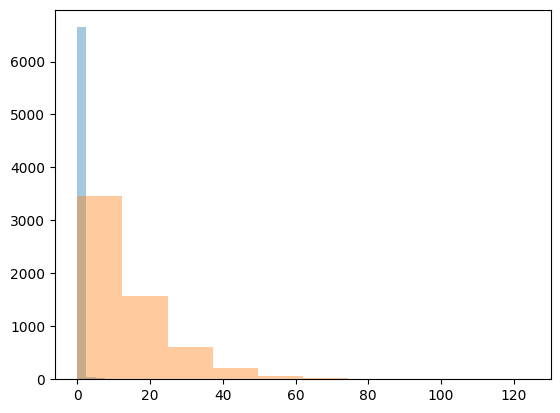

In [42]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no2])

plt.hist(hole1, alpha=0.4);
plt.hist(hole0, alpha=0.4);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [43]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

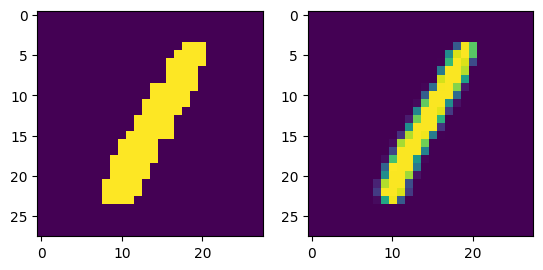

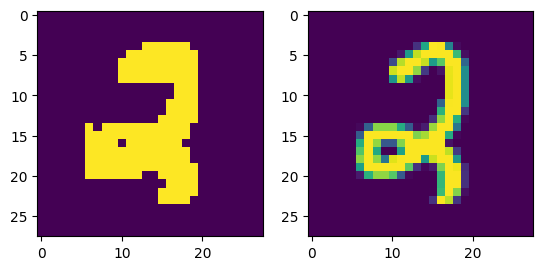

In [45]:
imgs = [no1[256,:,:],  no2[256,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

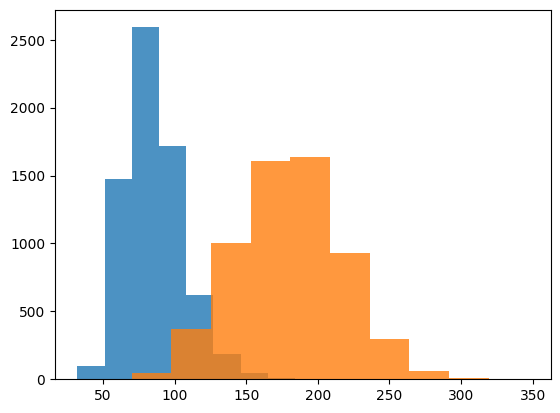

In [47]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no2])

plt.hist(hull1, alpha=0.8);
plt.hist(hull0, alpha=0.8);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [48]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

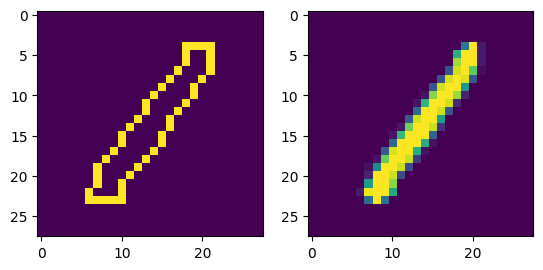

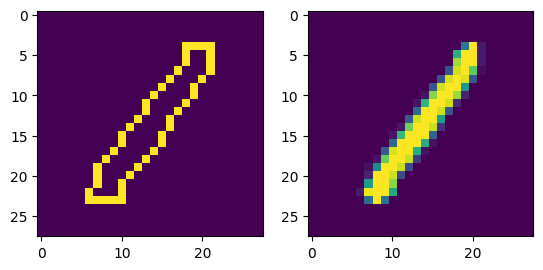

In [49]:
imgs = [no1[450,:,:],  no1[450,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

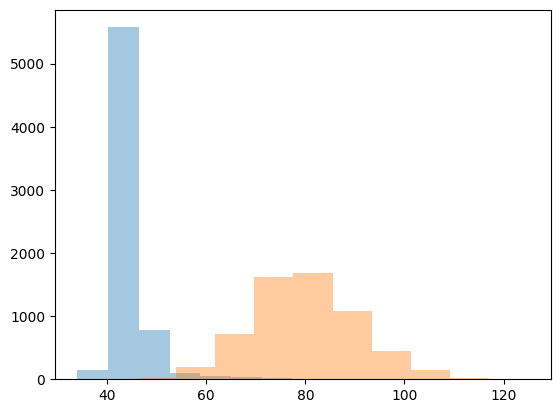

In [53]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no2])

plt.hist(bound1, alpha=0.4);
plt.hist(bound0, alpha=0.4);

What will happen if we plot two features together?

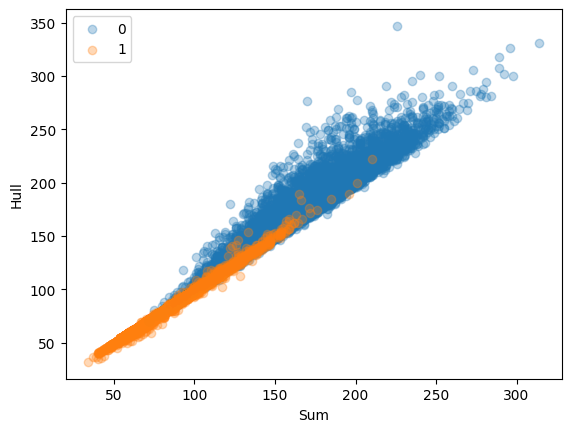

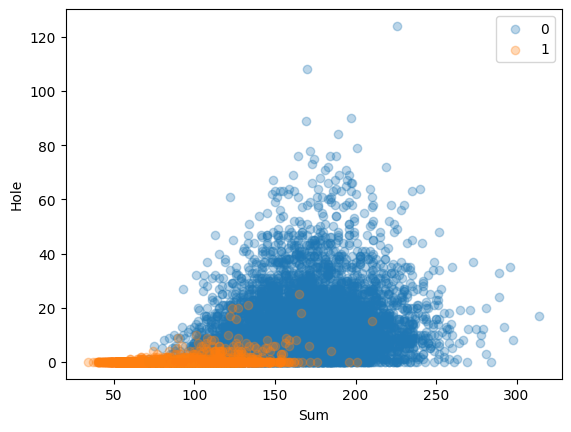

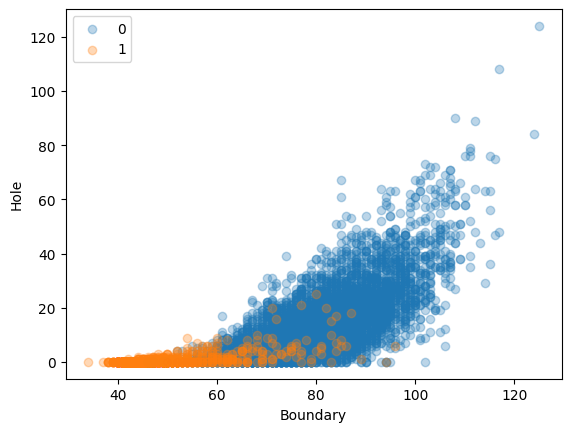

In [54]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.3)
plt.scatter(sum1, hull1, alpha=0.3)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.3)
plt.scatter(sum1, hole1, alpha=0.3)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.3)
plt.scatter(bound1, hole1, alpha=0.3)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [55]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.3)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
a) pixel vectors and Histogram of Oriented Gradients
2. How would you test or visualize four or more features?
a) To visualize four or more features we can use classification algorithm or dimentionality reduction
3. Can you come up with your own features?
a) yes
4. Will these features work for different classes other than 0 and 1?
a)It works for classes from 0 to 9
5. What will happen if we take more that two classes at a time?
a)Feature selection and engineering principles apply similarly to multi-class problems